In [34]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Excercise 1 - generated quantities

1. Compile code_1.stan and sample from it using M = F.

In [35]:
F = 3
L = 13
gen_quant = CmdStanModel(stan_file='code_1.stan')


INFO:cmdstanpy:found newer exe file, not recompiling


In [9]:
samples = gen_quant.sample(data={'M':F}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


2. Create a pandas dataframe from resulting draws.

In [10]:
df = samples.draws_pd()
df

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3]
0,0.0,0.0,95.6378,106.0,96.0,93.0
1,0.0,0.0,93.6308,97.0,106.0,95.0
2,0.0,0.0,70.3695,66.0,61.0,87.0
3,0.0,0.0,282.3050,291.0,293.0,271.0
4,0.0,0.0,202.6120,196.0,202.0,212.0
...,...,...,...,...,...,...
995,0.0,0.0,197.3080,221.0,208.0,184.0
996,0.0,0.0,79.6812,89.0,90.0,72.0
997,0.0,0.0,74.7428,68.0,63.0,83.0
998,0.0,0.0,21.9384,20.0,21.0,20.0


3. Plot a histogram for each of y_sim and lambda.

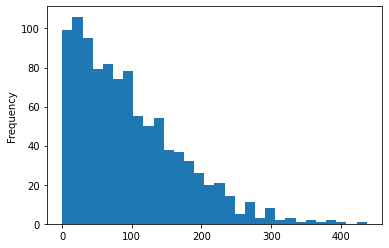

In [11]:
Lambda = df['lambda']
Lambda.plot.hist(bins = 30)
plt.show()

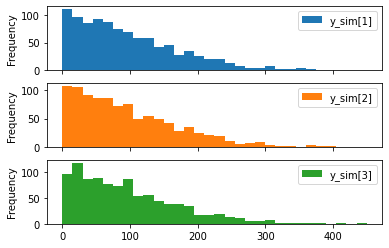

In [12]:
df2 = df.drop(df.columns[0:3],axis = 1)
df2.plot.hist(subplots = True, bins = 30)
plt.show()

### Excercise 2 - constraints on the data

1. Observe how constraints on data behave for code_2 and code_3.

In [13]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:compiling stan file C:\Users\igach\Desktop\Python_folder\code_2.stan to exe file C:\Users\igach\Desktop\Python_folder\code_2.exe
INFO:cmdstanpy:compiled model executable: C:\Users\igach\Desktop\Python_folder\code_2.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/igach/Desktop/Python_folder/code_2.hpp C:/Users/igach/Desktop/Python_folder/code_2.stan
Warning in 'C:/Users/igach/Desktop/Python_folder/code_2.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-unused-function -Wno-uninitialized -Wno-unused-but-set-variable -Wno-unused-variable -Wno-sign-compare -Wno-unused-local-typedefs -Wno-int-in-bool-context -Wno-attributes -Wno-ignored-attributes    


INFO:cmdstanpy:CmdStan done processing.


In [14]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:compiling stan file C:\Users\igach\Desktop\Python_folder\code_3.stan to exe file C:\Users\igach\Desktop\Python_folder\code_3.exe
INFO:cmdstanpy:compiled model executable: C:\Users\igach\Desktop\Python_folder\code_3.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/igach/Desktop/Python_folder/code_3.hpp C:/Users/igach/Desktop/Python_folder/code_3.stan
Warning in 'C:/Users/igach/Desktop/Python_folder/code_3.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-unused-function -Wno-uninitialized -Wno-unused-but-set-variable -Wno-unused-variable -Wno-sign-compare -Wno-unused-local-typedefs -Wno-int-in-bool-context -Wno-attributes -Wno-ignored-attributes    


INFO:cmdstanpy:CmdStan done processing.


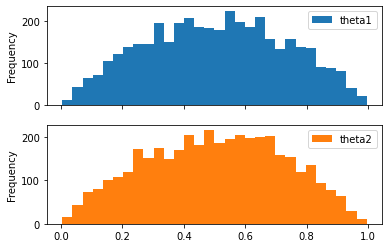

In [17]:
theta_1 = samp_bern1.stan_variable('theta')
theta_2 = samp_bern2.stan_variable('theta')
df = pd.DataFrame({'theta1': theta_1, 'theta2': theta_2})
df.plot.hist(subplots = True, bins = 30)
plt.show()

### Excercise 3 - constraints on the parameters

##### Unconstrained parameters

1. Constraints in parameters behave more subtely. We are infering theta without data from its prior.

2. Please see diagnostic messages from code_4 and how samples from it compare to the probability distribution.

3. Verify what changes if constraints are added as in code_5.

In [18]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples', iter_sampling=6000, iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()

INFO:cmdstanpy:compiling stan file C:\Users\igach\Desktop\Python_folder\code_4.stan to exe file C:\Users\igach\Desktop\Python_folder\code_4.exe
INFO:cmdstanpy:compiled model executable: C:\Users\igach\Desktop\Python_folder\code_4.exe
INFO:cmdstanpy:created output directory: C:\Users\igach\Desktop\Python_folder\samples
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▏         | 00:00 Status


chain 1 |██▋       | 00:00 Iteration: 1600 / 7000 [ 22%]  (Sampling)


chain 1 |████▋     | 00:00 Iteration: 3100 / 7000 [ 44%]  (Sampling)


chain 1 |██████▉   | 00:00 Iteration: 4700 / 7000 [ 67%]  (Sampling)


chain 1 |████████▉ | 00:00 Iteration: 6100 / 7000 [ 87%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: C:\\Users\\igach\\Desktop\\Python_folder\\samples\\code_4-20220315100852_1.csv, C:\\Users\\igach\\Desktop\\Python_folder\\samples\\code_4-20220315100852_2.csv, C:\\Users\\igach\\Desktop\\Python_folder\\samples\\code_4-20220315100852_3.csv, C:\\Users\\igach\\Desktop\\Python_folder\\samples\\code_4-20220315100852_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n8638 of 24000 (35.99%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

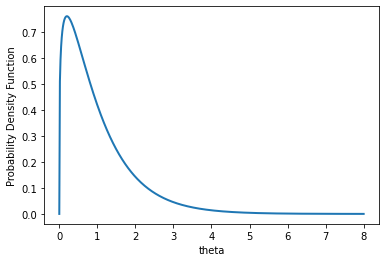

In [19]:
N = 500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth = 2)

## add histogram of theta samples with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()


#### Constrained parameter

In [21]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:compiling stan file C:\Users\igach\Desktop\Python_folder\code_5.stan to exe file C:\Users\igach\Desktop\Python_folder\code_5.exe
INFO:cmdstanpy:compiled model executable: C:\Users\igach\Desktop\Python_folder\code_5.exe
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▊         | 00:00 Iteration:  400 / 7000 [  5%]  (Warmup)


chain 1 |████      | 00:00 Iteration: 2600 / 7000 [ 37%]  (Sampling)


chain 1 |██████▉   | 00:00 Iteration: 4700 / 7000 [ 67%]  (Sampling)


chain 1 |█████████▍| 00:00 Iteration: 6500 / 7000 [ 92%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: C:\\Users\\igach\\Desktop\\Python_folder\\samples\\code_5-20220315101937_1.csv, C:\\Users\\igach\\Desktop\\Python_folder\\samples\\code_5-20220315101937_2.csv, C:\\Users\\igach\\Desktop\\Python_folder\\samples\\code_5-20220315101937_3.csv, C:\\Users\\igach\\Desktop\\Python_folder\\samples\\code_5-20220315101937_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n1 of 24000 (0.00%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

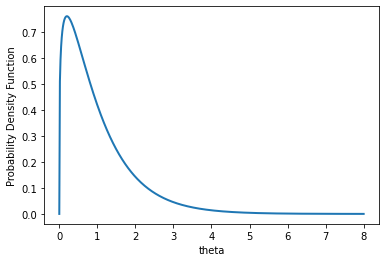

In [22]:
N = 500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth = 2)

## add histogram of theta samples with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()


Result: No warnings like in code_4.

### Excercise 4 - functions and different functionalities of stan

1. Stan outside of sampling allows for certain computational tools. In particular equation solving.

2. Using code_6 find the standard deviation of half_normal distribution, such that with 99% probability samples from it will be less than (F+L)/2.

In [23]:
model_tune = CmdStanModel(stan_file='code_6.stan')

F = 3
L = 13
y0 = 1# initial guess for the equation solving

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)
tunes.draws_pd()

INFO:cmdstanpy:compiling stan file C:\Users\igach\Desktop\Python_folder\code_6.stan to exe file C:\Users\igach\Desktop\Python_folder\code_6.exe
INFO:cmdstanpy:compiled model executable: C:\Users\igach\Desktop\Python_folder\code_6.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/igach/Desktop/Python_folder/code_6.hpp C:/Users/igach/Desktop/Python_folder/code_6.stan
Warning in 'C:/Users/igach/Desktop/Python_folder/code_6.stan', line 2, column 44: Declaration
    of arrays by placing brackets after a type is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in 'C:/Users/igach/Desktop/Python_folder/code_6.stan', line 2, column 56: Declaration
    of arrays by placing brackets after a type is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the a


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,sigma
0,0.0,0.0,3.1058


### Excercise 5 - different methods of defining models

1. Implement all the examples

2. Use them to generate distributuion for N=F.

In [26]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 11111999 #integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)



chain 1 |██████████| 00:00 Iteration: 1900 / 2000 [ 95%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |█████████▌| 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


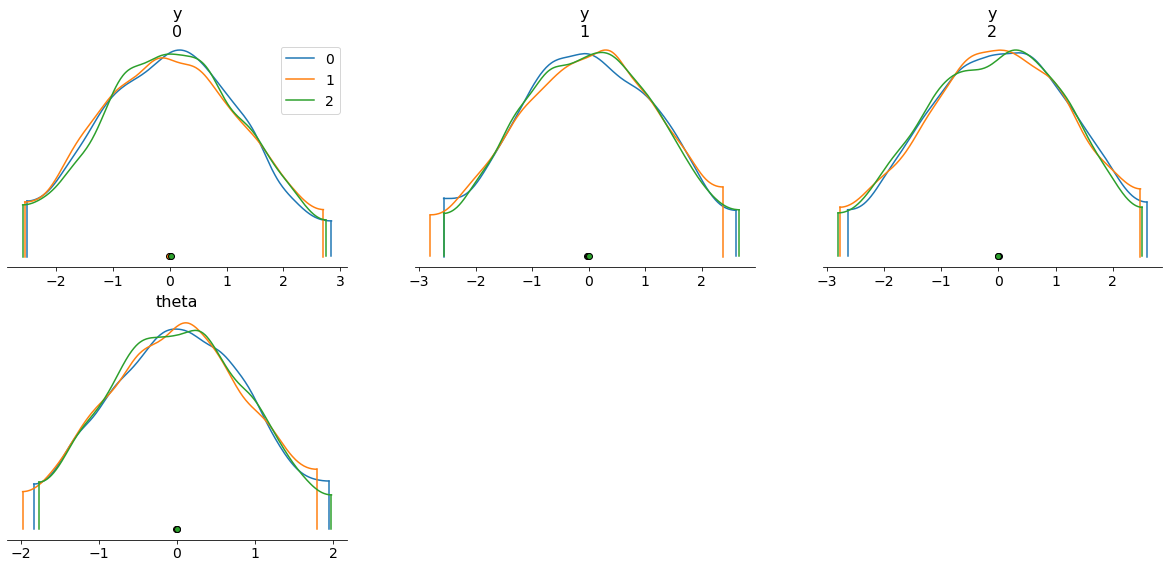

In [27]:
az.plot_density([result_1,result_2,result_3])
plt.show()

### Excercise 6 - generated quantities post sampling

1. Implement code_10.stan.

2. Using generate_quantities() method use samples from previous excercises and and analyze mean of $y$.

In [39]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_3)
# investigate the output and plot histogram of mean_y variable

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] done processing


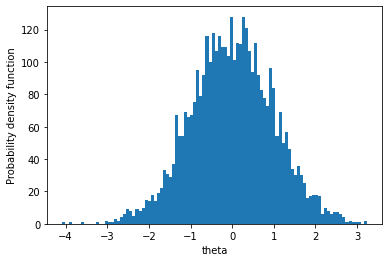

In [44]:
plt.hist(mean_of_y.stan_variable('theta'), bins=100)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability density function")
plt.show()